In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import scikitplot as skplt

In [2]:
df= pd.read_csv('./data/positive_emotion_dataset.csv').drop(columns='Unnamed: 0')
df

,ad,pos_emo
0,i am proud and excited to be your mayor\nalex ...,1
1,proud to work with rep andy kim to secure mil...,1
2,in recent days i have received many questions ...,1
3,this is a fantastic idea we need to stopkavan...,1
4,in these deeply divided times connecting commu...,1
...,...,...
19995,from maggie thatcher to theresa may i know whi...,0
19996,vote is available in many areas across north ...,0
19997,you have to register before you can vote,0
19998,dana balter would put washington bureaucrats i...,0


In [3]:
X_train,  X_test, y_train, y_test  = train_test_split(df['ad'], df['pos_emo'], test_size =0.2  , random_state = 42)

In [4]:
# Use term frequency to represent documents
tf_vectorizer = TfidfVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [5]:
# training the model using a linear kernal
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train_tf, y_train)

SVC(gamma='auto', kernel='linear')

accuracy:   0.930
                     precision    recall  f1-score   support

no positive emotion       0.91      0.95      0.93      1981
   positive emotion       0.95      0.91      0.93      2019

           accuracy                           0.93      4000
          macro avg       0.93      0.93      0.93      4000
       weighted avg       0.93      0.93      0.93      4000

confusion matrix:
[[1889   92]
 [ 186 1833]]



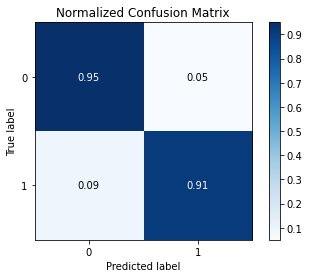

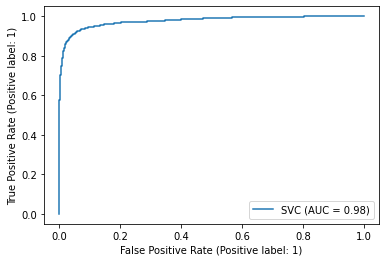

In [6]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no positive emotion', 'positive emotion']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [7]:
df_val = pd.read_csv('./data/sample_positive_emotion.csv')
df_val

,ad,pos_emo
0,see why everyone is celebrating at hoblit dodg...,1
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,1
3,we have until march st to raise money for our ...,0
4,learn how to use the new staffing law to impro...,0
...,...,...
145,let us build cameroon wake up cameroonians and...,1
146,studies show that of all children possess cre...,1
147,if you are a developer who wants to make a dif...,1
148,learn the greatest tips tricks from the world...,1


accuracy:   0.653
                      precision    recall  f1-score   support

no-positivce emotion       0.72      0.81      0.76       102
    positive emotion       0.44      0.31      0.37        48

            accuracy                           0.65       150
           macro avg       0.58      0.56      0.56       150
        weighted avg       0.63      0.65      0.63       150

confusion matrix:
[[83 19]
 [33 15]]



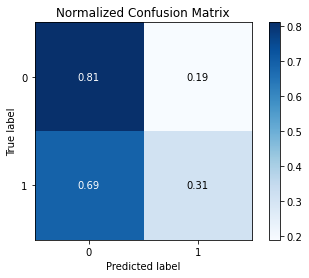

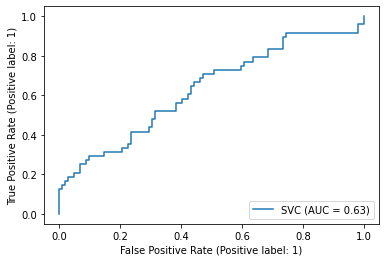

In [8]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['pos_emo']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-positivce emotion', 'positive emotion']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)